TensorFlow version: 2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training for 5 epochs (quick) ...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 108ms/step - accuracy: 0.8659 - loss: 0.4917 - val_accuracy: 0.9840 - val_loss: 0.0581
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 77s 97ms/step - accuracy: 0.9807 - loss: 0.0617 - val_accuracy: 0.9878 - val_loss: 0.0427
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9874 - loss: 0.0407 - val_accuracy: 0.9888 - val_loss: 0.0375
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9908 - loss: 0.0300 - val_accuracy: 0.9902 - val_loss: 0.0337
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.9932 - loss: 0.0226 - val_accuracy: 0.9912 - val_loss: 0.0355
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step

=== Task 1 results ===


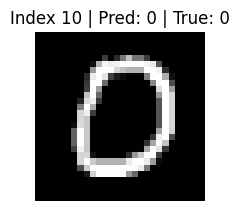

Index 10 -> Predicted: 0  True: 0
Softmax top probabilities (top 5):
  class 0: 1.0000
  class 2: 0.0000
  class 8: 0.0000
  class 9: 0.0000
  class 6: 0.0000
------------------------------------


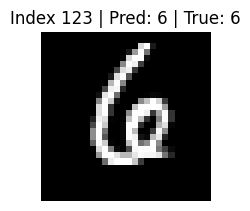

Index 123 -> Predicted: 6  True: 6
Softmax top probabilities (top 5):
  class 6: 1.0000
  class 5: 0.0000
  class 8: 0.0000
  class 0: 0.0000
  class 4: 0.0000
------------------------------------


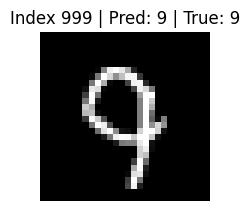

Index 999 -> Predicted: 9  True: 9
Softmax top probabilities (top 5):
  class 9: 0.9971
  class 8: 0.0018
  class 7: 0.0006
  class 4: 0.0004
  class 5: 0.0000
------------------------------------
Saved Task 1 results to task1_results.json


=== Task 2: Custom Synthetic Image Test ===


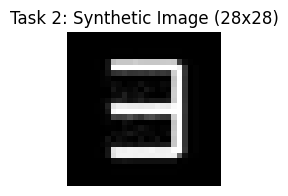

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Label for synthetic image: 3
Softmax Probabilities (all classes):
  class 0: 0.0000
  class 1: 0.0000
  class 2: 0.0000
  class 3: 0.9999
  class 4: 0.0000
  class 5: 0.0000
  class 6: 0.0000
  class 7: 0.0000
  class 8: 0.0000
  class 9: 0.0000
Saved Task 2 results to task2_results.json


In [ ]:
# task1_task2_synthetic.py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random
import os
import json
from PIL import Image, ImageDraw

# -------------------------
# reproducibility seed
# -------------------------
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

print("TensorFlow version:", tf.__version__)

# -------------------------
# 1) load MNIST
# -------------------------
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)
num_classes = 10

# -------------------------
# 2) build CNN model
# -------------------------
def build_cnn():
    model = keras.Sequential([
        layers.Input(shape=(28,28,1)),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax")
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# -------------------------
# 3) train model quickly
# -------------------------
model = build_cnn()
print("Training for 5 epochs (quick) ...")
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=1)

# -------------------------
# Task 1 — Deep Prediction Analysis
# -------------------------
indices = [10, 123, 999]
samples = x_test[indices]
true_labels = y_test[indices]

probs = model.predict(samples)           # softmax probabilities
pred_labels = np.argmax(probs, axis=1)   # predicted classes

print("\n=== Task 1 results ===")
for i, idx in enumerate(indices):
    plt.figure(figsize=(2.2,2.2))
    plt.imshow(samples[i].squeeze(), cmap='gray')
    plt.title(f"Index {idx} | Pred: {pred_labels[i]} | True: {true_labels[i]}")
    plt.axis('off')
    plt.show()
    print(f"Index {idx} -> Predicted: {pred_labels[i]}  True: {true_labels[i]}")
    print("Softmax top probabilities (top 5):")
    top5 = np.argsort(probs[i])[::-1][:5]
    for k in top5:
        print(f"  class {k}: {probs[i][k]:.4f}")
    print("-"*36)

# save Task 1 results
out_task1 = {
    "indices": indices,
    "pred_labels": pred_labels.tolist(),
    "true_labels": true_labels.tolist(),
    "probs": probs.tolist()
}
with open("task1_results.json", "w") as f:
    json.dump(out_task1, f)
print("Saved Task 1 results to task1_results.json")

# -------------------------
# Task 2 — Custom Synthetic Image
# -------------------------
print("\n\n=== Task 2: Custom Synthetic Image Test ===")

# create a simple synthetic digit (like "3")
img_size = 140
img = Image.new("L", (img_size, img_size), color=255)  # white background
draw = ImageDraw.Draw(img)
draw.line([(40,30),(100,30),(100,70),(40,70)], width=10)
draw.line([(40,70),(100,70),(100,110),(40,110)], width=10)
# add some random noise
for _ in range(200):
    x = random.randint(35,105)
    y = random.randint(25,115)
    img.putpixel((x,y), random.randint(0,40))

# resize to 28x28
img_small = img.resize((28,28), resample=Image.Resampling.LANCZOS)
arr = np.array(img_small).astype("float32")
arr = 255 - arr          # invert to match MNIST white digit on black
arr = arr / 255.0
processed_image = arr.reshape(1,28,28,1)

# display the synthetic image
plt.figure(figsize=(2,2))
plt.imshow(arr, cmap='gray')
plt.title("Task 2: Synthetic Image (28x28)")
plt.axis('off')
plt.show()

# run prediction
pred = model.predict(processed_image)
pred_label = int(np.argmax(pred))
probs_list = pred.flatten().tolist()

print(f"Predicted Label for synthetic image: {pred_label}")
print("Softmax Probabilities (all classes):")
for i, p in enumerate(probs_list):
    print(f"  class {i}: {p:.4f}")

# save Task 2 results
out_task2 = {
    "predicted_label": pred_label,
    "probabilities": probs_list
}
with open("task2_results.json", "w") as f:
    json.dump(out_task2, f)
print("Saved Task 2 results to task2_results.json")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training for 5 epochs...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 50s 115ms/step - accuracy: 0.8643 - loss: 0.4967 - val_accuracy: 0.9805 - val_loss: 0.0677
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 110ms/step - accuracy: 0.9805 - loss: 0.0626 - val_accuracy: 0.9880 - val_loss: 0.0429
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 112ms/step - accuracy: 0.9879 - loss: 0.0390 - val_accuracy: 0.9863 - val_loss: 0.0474
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.9904 - loss: 0.0309 - val_accuracy: 0.9902 - val_loss: 0.0367
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 109ms/step - accuracy: 0.9933 - loss: 0.0231 - val_accuracy: 0.9890 - val_loss: 0.0397

Training for 10 epochs...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 104ms/step - accuracy: 0.8504 - loss: 0.5178 - val_accuracy: 0.9785 - val_loss: 0.0708
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 109ms/step - accuracy: 0.9787 - loss: 0.0697 - val_accuracy: 0.9858 - v

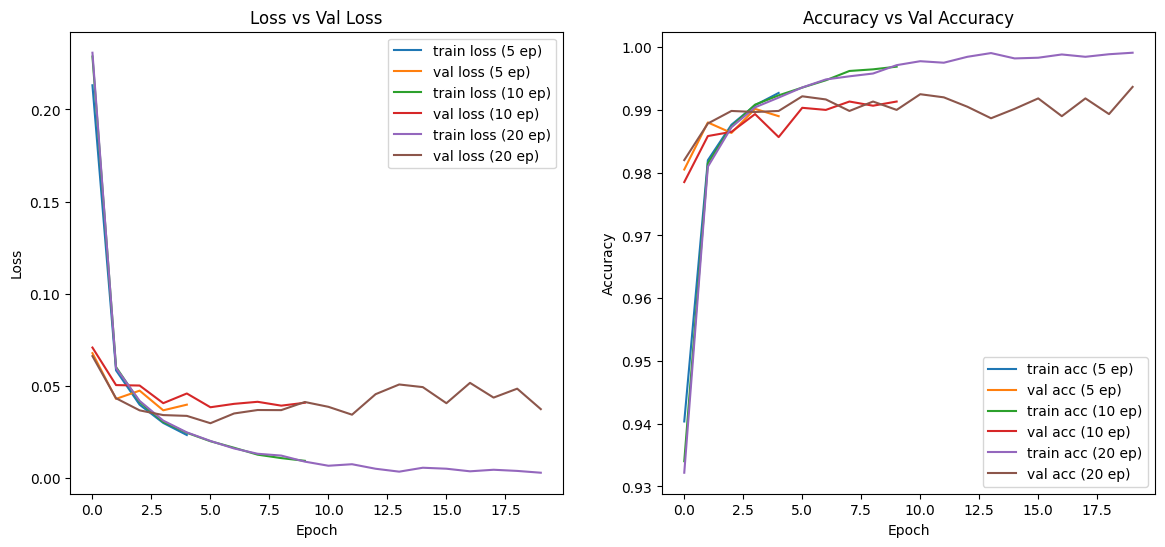

In [1]:
# task3_learning_curves.py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# ------------------
# Load MNIST
# ------------------
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32")/255.0
x_test  = x_test.astype("float32")/255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

# ------------------
# Build model
# ------------------
def build_cnn():
    model = keras.Sequential([
        layers.Input(shape=(28,28,1)),
        layers.Conv2D(32,3,activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(64,3,activation="relu"),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(128,activation="relu"),
        layers.Dense(10,activation="softmax")
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

epochs_list = [5, 10, 20]
histories = {}

for ep in epochs_list:
    print(f"\nTraining for {ep} epochs...")
    model = build_cnn()
    history = model.fit(
        x_train, y_train,
        validation_split=0.1,
        epochs=ep,
        batch_size=128,
        verbose=1
    )
    histories[ep] = history

# ------------------
# Plot Curves
# ------------------
plt.figure(figsize=(14,6))

# Loss curves
plt.subplot(1,2,1)
for ep in epochs_list:
    plt.plot(histories[ep].history["loss"], label=f"train loss ({ep} ep)")
    plt.plot(histories[ep].history["val_loss"], label=f"val loss ({ep} ep)")
plt.title("Loss vs Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy curves
plt.subplot(1,2,2)
for ep in epochs_list:
    plt.plot(histories[ep].history["accuracy"], label=f"train acc ({ep} ep)")
    plt.plot(histories[ep].history["val_accuracy"], label=f"val acc ({ep} ep)")
plt.title("Accuracy vs Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


In [2]:
# task4_early_stopping.py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# ------------------
# Load data
# ------------------
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32")/255.0
x_test  = x_test.astype("float32")/255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

# ------------------
# Build model
# ------------------
def build_cnn():
    model = keras.Sequential([
        layers.Input(shape=(28,28,1)),
        layers.Conv2D(32,3,activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(64,3,activation="relu"),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(128,activation="relu"),
        layers.Dense(10,activation="softmax")
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

callback = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True
)

model = build_cnn()

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=128,
    callbacks=[callback],
    verbose=1
)

print("\nTraining stopped at epoch:", len(history.history["loss"]))


Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 101ms/step - accuracy: 0.8381 - loss: 0.5325 - val_accuracy: 0.9835 - val_loss: 0.0604
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9790 - loss: 0.0683 - val_accuracy: 0.9880 - val_loss: 0.0512
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 103ms/step - accuracy: 0.9850 - loss: 0.0462 - val_accuracy: 0.9887 - val_loss: 0.0427
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 103ms/step - accuracy: 0.9900 - loss: 0.0322 - val_accuracy: 0.9887 - val_loss: 0.0438
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.9920 - loss: 0.0250 - val_accuracy: 0.9890 - val_loss: 0.0377
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 103ms/step - accuracy: 0.9947 - loss: 0.0176 - val_accuracy: 0.9893 - val_loss: 0.0417
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.9954 - loss: 0.0148 - val_accuracy: 0.9862 - val_loss: 0.0504
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 104ms/step - accuracy: 0.9963 - loss: 0


Training with Dropout = 0.0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 0.8644 - loss: 0.4848 - val_accuracy: 0.9765 - val_loss: 0.0852
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9752 - loss: 0.0837 - val_accuracy: 0.9863 - val_loss: 0.0543
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.9857 - loss: 0.0492 - val_accuracy: 0.9877 - val_loss: 0.0496
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 73ms/step - accuracy: 0.9899 - loss: 0.0353 - val_accuracy: 0.9887 - val_loss: 0.0448
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 66ms/step - accuracy: 0.9929 - loss: 0.0242 - val_accuracy: 0.9880 - val_loss: 0.0480
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9948 - loss: 0.0186 - val_accuracy: 0.9887 - val_loss: 0.0467
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9969 - loss: 0.0122 - val_accuracy: 0.9880 - val_loss: 0.0451
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.9977 - loss: 0.0098 - 

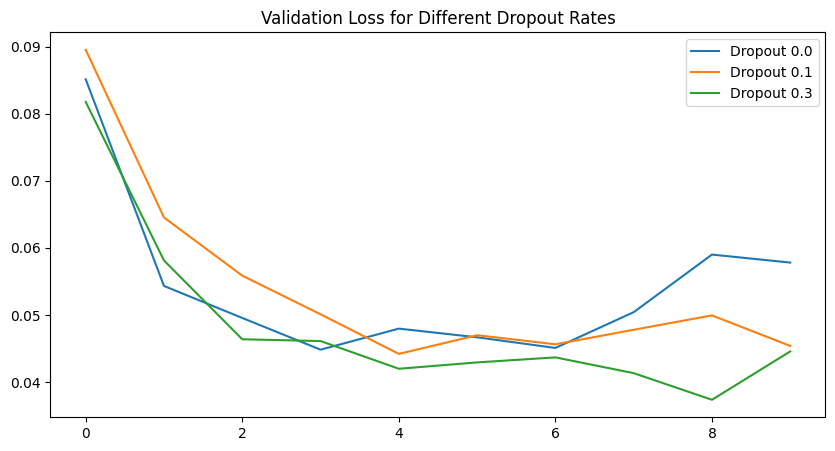

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)/255.0
x_test  = x_test.reshape(-1,28,28,1)/255.0

def build_model(dropout_rate):
    model = keras.Sequential([
        layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

dropouts = [0.0, 0.1, 0.3]
histories = {}

for d in dropouts:
    print(f"\nTraining with Dropout = {d}")
    model = build_model(d)
    history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                        validation_split=0.1, verbose=1)
    histories[d] = history

# Plot
plt.figure(figsize=(10,5))
for d in dropouts:
    plt.plot(histories[d].history['val_loss'], label=f'Dropout {d}')
plt.title("Validation Loss for Different Dropout Rates")
plt.legend()
plt.show()




Training with L2 = 0.0001
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - accuracy: 0.8681 - loss: 0.4985 - val_accuracy: 0.9797 - val_loss: 0.1142
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9759 - loss: 0.1162 - val_accuracy: 0.9830 - val_loss: 0.0935
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9822 - loss: 0.0933 - val_accuracy: 0.9818 - val_loss: 0.0905
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9860 - loss: 0.0800 - val_accuracy: 0.9848 - val_loss: 0.0854
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.9881 - loss: 0.0721 - val_accuracy: 0.9855 - val_loss: 0.0821
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9900 - loss: 0.0640 - val_accuracy: 0.9860 - val_loss: 0.0841
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.9909 - loss: 0.0600 - val_accuracy: 0.9868 - val_loss: 0.0767
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accurac

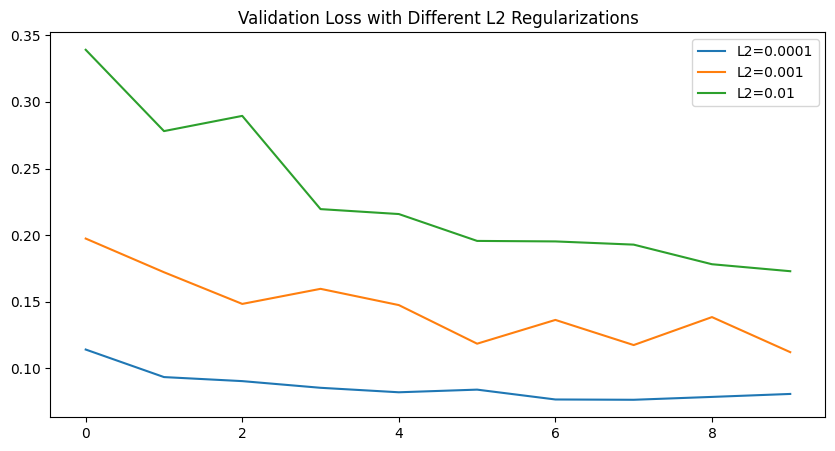

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt

# Same dataset
(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1) / 255.0

def build_model(l2_value):
    model = keras.Sequential([
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_value)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

l2_values = [0.0001, 0.001, 0.01]
histories = {}

for reg in l2_values:
    print(f"\nTraining with L2 = {reg}")
    model = build_model(reg)
    history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                        validation_split=0.1, verbose=1)
    histories[reg] = history

# Plot
plt.figure(figsize=(10,5))
for reg in l2_values:
    plt.plot(histories[reg].history['val_loss'], label=f"L2={reg}")
plt.title("Validation Loss with Different L2 Regularizations")
plt.legend()
plt.show()



Training with SGD
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.6024 - loss: 1.5492 - val_accuracy: 0.9117 - val_loss: 0.3311
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.8931 - loss: 0.3843 - val_accuracy: 0.9297 - val_loss: 0.2539
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9106 - loss: 0.3089 - val_accuracy: 0.9358 - val_loss: 0.2237
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.9193 - loss: 0.2782 - val_accuracy: 0.9447 - val_loss: 0.2021
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.9278 - loss: 0.2502 - val_accuracy: 0.9470 - val_loss: 0.1883
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.9335 - loss: 0.2267 - val_accuracy: 0.9508 - val_loss: 0.1738
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.9384 - loss: 0.2093 - val_accuracy: 0.9553 - val_loss: 0.1640
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.943

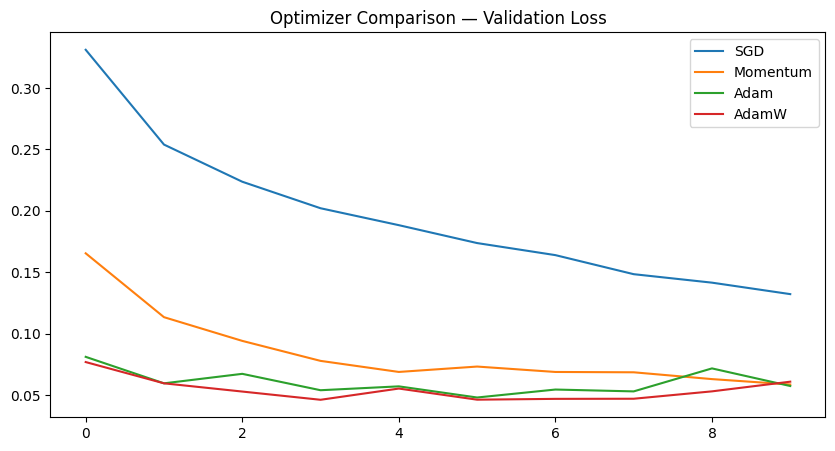

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Dataset
(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1) / 255.0

def build_model(optimizer):
    model = keras.Sequential([
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

optimizers = {
    "SGD": keras.optimizers.SGD(0.01),
    "Momentum": keras.optimizers.SGD(0.01, momentum=0.9),
    "Adam": keras.optimizers.Adam(),
    "AdamW": keras.optimizers.AdamW()
}

histories = {}

for name, opt in optimizers.items():
    print(f"\nTraining with {name}")
    model = build_model(opt)
    hist = model.fit(x_train, y_train, epochs=10, batch_size=128,
                     validation_split=0.1, verbose=1)
    histories[name] = hist

plt.figure(figsize=(10,5))
for name in histories:
    plt.plot(histories[name].history['val_loss'], label=name)
plt.title("Optimizer Comparison — Validation Loss")
plt.legend()
plt.show()



Training with batch size = 8
Epoch 1/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 104s 15ms/step - accuracy: 0.9260 - loss: 0.2471 - val_accuracy: 0.9813 - val_loss: 0.0664
Epoch 2/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 98s 15ms/step - accuracy: 0.9843 - loss: 0.0500 - val_accuracy: 0.9873 - val_loss: 0.0456
Epoch 3/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 147s 15ms/step - accuracy: 0.9921 - loss: 0.0252 - val_accuracy: 0.9872 - val_loss: 0.0531
Epoch 4/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 102s 15ms/step - accuracy: 0.9950 - loss: 0.0159 - val_accuracy: 0.9873 - val_loss: 0.0550
Epoch 5/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 100s 15ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9880 - val_loss: 0.0628
Epoch 6/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 111s 16ms/step - accuracy: 0.9974 - loss: 0.0082 - val_accuracy: 0.9878 - val_loss: 0.0753
Epoch 7/10
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 106s 16ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9890 - val_loss: 0.0763
Epoch 8/10
6750/6750 ━━━━━━━━━━━━━━━━━━━

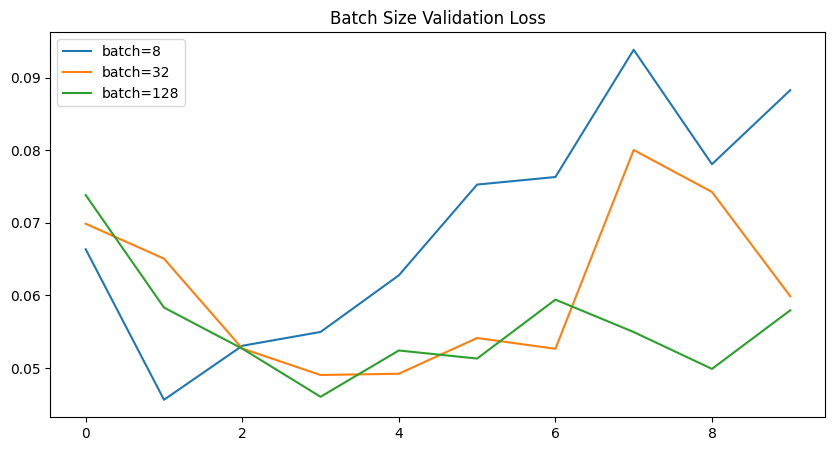

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)/255.0

def build_model():
    model = keras.Sequential([
        layers.Conv2D(32,3,activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

batch_sizes = [8, 32, 128]
histories = {}

for b in batch_sizes:
    print(f"\nTraining with batch size = {b}")
    model = build_model()
    hist = model.fit(x_train, y_train, batch_size=b,
                     epochs=10, validation_split=0.1, verbose=1)
    histories[b] = hist

plt.figure(figsize=(10,5))
for b in batch_sizes:
    plt.plot(histories[b].history["val_loss"], label=f"batch={b}")
plt.legend()
plt.title("Batch Size Validation Loss")
plt.show()



Training with activation = tanh
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 76ms/step - accuracy: 0.8621 - loss: 0.4511 - val_accuracy: 0.9688 - val_loss: 0.1103
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 73ms/step - accuracy: 0.9695 - loss: 0.1091 - val_accuracy: 0.9777 - val_loss: 0.0783
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 79ms/step - accuracy: 0.9820 - loss: 0.0630 - val_accuracy: 0.9832 - val_loss: 0.0648
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 75ms/step - accuracy: 0.9902 - loss: 0.0384 - val_accuracy: 0.9833 - val_loss: 0.0567
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.9936 - loss: 0.0257 - val_accuracy: 0.9853 - val_loss: 0.0530
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 33s 78ms/step - accuracy: 0.9969 - loss: 0.0168 - val_accuracy: 0.9860 - val_loss: 0.0477
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 77ms/step - accuracy: 0.9977 - loss: 0.0121 - val_accuracy: 0.9868 - val_loss: 0.0472
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - a

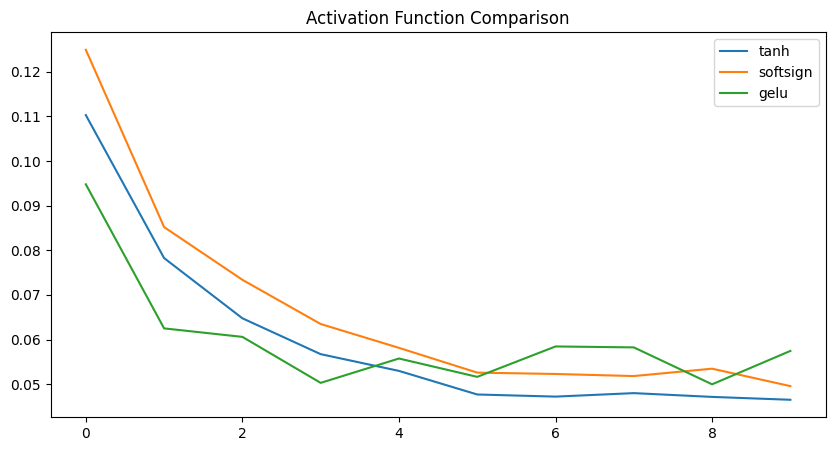

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)/255.0

def build_model(activation_fn):
    model = keras.Sequential([
        layers.Conv2D(32,3,activation=activation_fn),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation=activation_fn),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

activations = ["tanh", "softsign", "gelu"]
histories = {}

for act in activations:
    print(f"\nTraining with activation = {act}")
    model = build_model(act)
    hist = model.fit(x_train, y_train, epochs=10,
                     batch_size=128, validation_split=0.1, verbose=1)
    histories[act] = hist

plt.figure(figsize=(10,5))
for act in activations:
    plt.plot(histories[act].history["val_loss"], label=act)
plt.legend()
plt.title("Activation Function Comparison")
plt.show()


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)/255.0

model = keras.Sequential([
    layers.Conv2D(32,3,activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.1)

w, b = model.layers[3].get_weights()
print("Weight shape for Dense layer:", w.shape)
print("Bias shape:", b.shape)


Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 70ms/step - accuracy: 0.8720 - loss: 0.4747 - val_accuracy: 0.9772 - val_loss: 0.0822
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.9767 - loss: 0.0819 - val_accuracy: 0.9833 - val_loss: 0.0570
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9853 - loss: 0.0500 - val_accuracy: 0.9853 - val_loss: 0.0532
Weight shape for Dense layer: (5408, 128)
Bias shape: (128,)
